# House Prices Advanced Regression Techniques - Random Forest Regressor

- Using Random Forest Regressor;
- Filling all missing values;
- Work with all values;
- **Target**: *SalePrice*

[Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [1]:
# Imports
import os 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
# Configs
sns.set_style('darkgrid')
datasource_base_path = "./../data/"

In [3]:
# Function to measure results
def results_regression(y_test_ ,y_pred_):
    mse = mean_squared_error(y_test_ ,y_pred_)
    print(f"MSE: {mse}")
    
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    
    mae = mean_absolute_error(y_test_ ,y_pred_)
    print(f"MAE: {mae}")
    
    mape = mean_absolute_percentage_error(y_test_ ,y_pred_)
    print(f"MAPE: {mape}")
    
    r2 = r2_score(y_test_ ,y_pred_)
    print(f"R2_SCORE {r2}")

In [4]:
# Loading train dataset
data = pd.read_csv(os.path.join(datasource_base_path, "train.csv"))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Pre process

In [5]:
# Show types distribution and data describe
display('Data type distribution', data.dtypes.value_counts())
display('describe dataset', data.describe())

'Data type distribution'

object     43
int64      35
float64     3
dtype: int64

'describe dataset'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Build a map to replace category features according to sales price mean
def get_scaled(mean):
    scaler = MaxAbsScaler().set_output(transform='pandas')
    mean_reshaped = np.array(mean).reshape(-1,1)
    transform = scaler.fit(mean_reshaped)
    res = {}
    for k, v in zip(mean.index, transform.transform(mean_reshaped).values.flatten()):
        res[k] = v 

    return res
# Return a dictionary map with kes and values of category features
columns = data.select_dtypes(include='object').columns
label_encoder_custom_map = {}
for col in columns:
    mean = data.groupby(col)['SalePrice'].mean().sort_values()
    scaler = StandardScaler()
    label_encoder_custom_map[col] = get_scaled(mean)

def process_dataset(df):
    try:
        # dropping features with > .75 of null values
        cols_to_drop = []
        for col in df.columns:
            if df[col].isna().sum() > df.shape[0] * .75:
                cols_to_drop.append(col)

        df.drop(columns=cols_to_drop, axis=1, inplace=True)
        
        # Filling remaining NaNs values with mode or median
        print('Filling remaining Nan values')
        for col in df.columns:
            if df[col].isna().sum() > 0:
                # string values filling with mode
                if df[col].dtypes == 'object':
                    mode_val = df[col].mode().values[0]
                    df[col].fillna(mode_val, inplace=True)
                # numeric values filling with median
                elif df[col].dtypes in ['float', 'int']:
                    median_val = df[col].median()
                    df[col].fillna(median_val, inplace=True)

        # encoder string values
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = df[col].apply(lambda x : label_encoder_custom_map[col].get(x))
            
        # Drop unnecessay column
        df.drop(columns=['Id'], axis=1, inplace=True)
    except Exception as e:
        print(e)
        pass
    finally:
        display(df.head())
        return df
    
data = process_dataset(data)

Filling remaining Nan values


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0.892488,65.0,8450,1.0,0.686955,0.778217,1.0,0.790415,0.880504,...,0,0,0,0,0,2,2008,0.630677,0.643436,208500
1,20,0.892488,80.0,9600,1.0,0.686955,0.778217,1.0,0.794867,0.880504,...,0,0,0,0,0,5,2007,0.630677,0.643436,181500
2,60,0.892488,68.0,11250,1.0,0.859354,0.778217,1.0,0.790415,0.880504,...,0,0,0,0,0,9,2008,0.630677,0.643436,223500
3,70,0.892488,60.0,9550,1.0,0.859354,0.778217,1.0,0.811345,0.880504,...,272,0,0,0,0,2,2006,0.630677,0.538124,140000
4,60,0.892488,84.0,14260,1.0,0.859354,0.778217,1.0,0.794867,0.880504,...,0,0,0,0,0,12,2008,0.630677,0.643436,250000


In [7]:
# Validate missing values
data.isna().sum().sum()

0

## Analyze

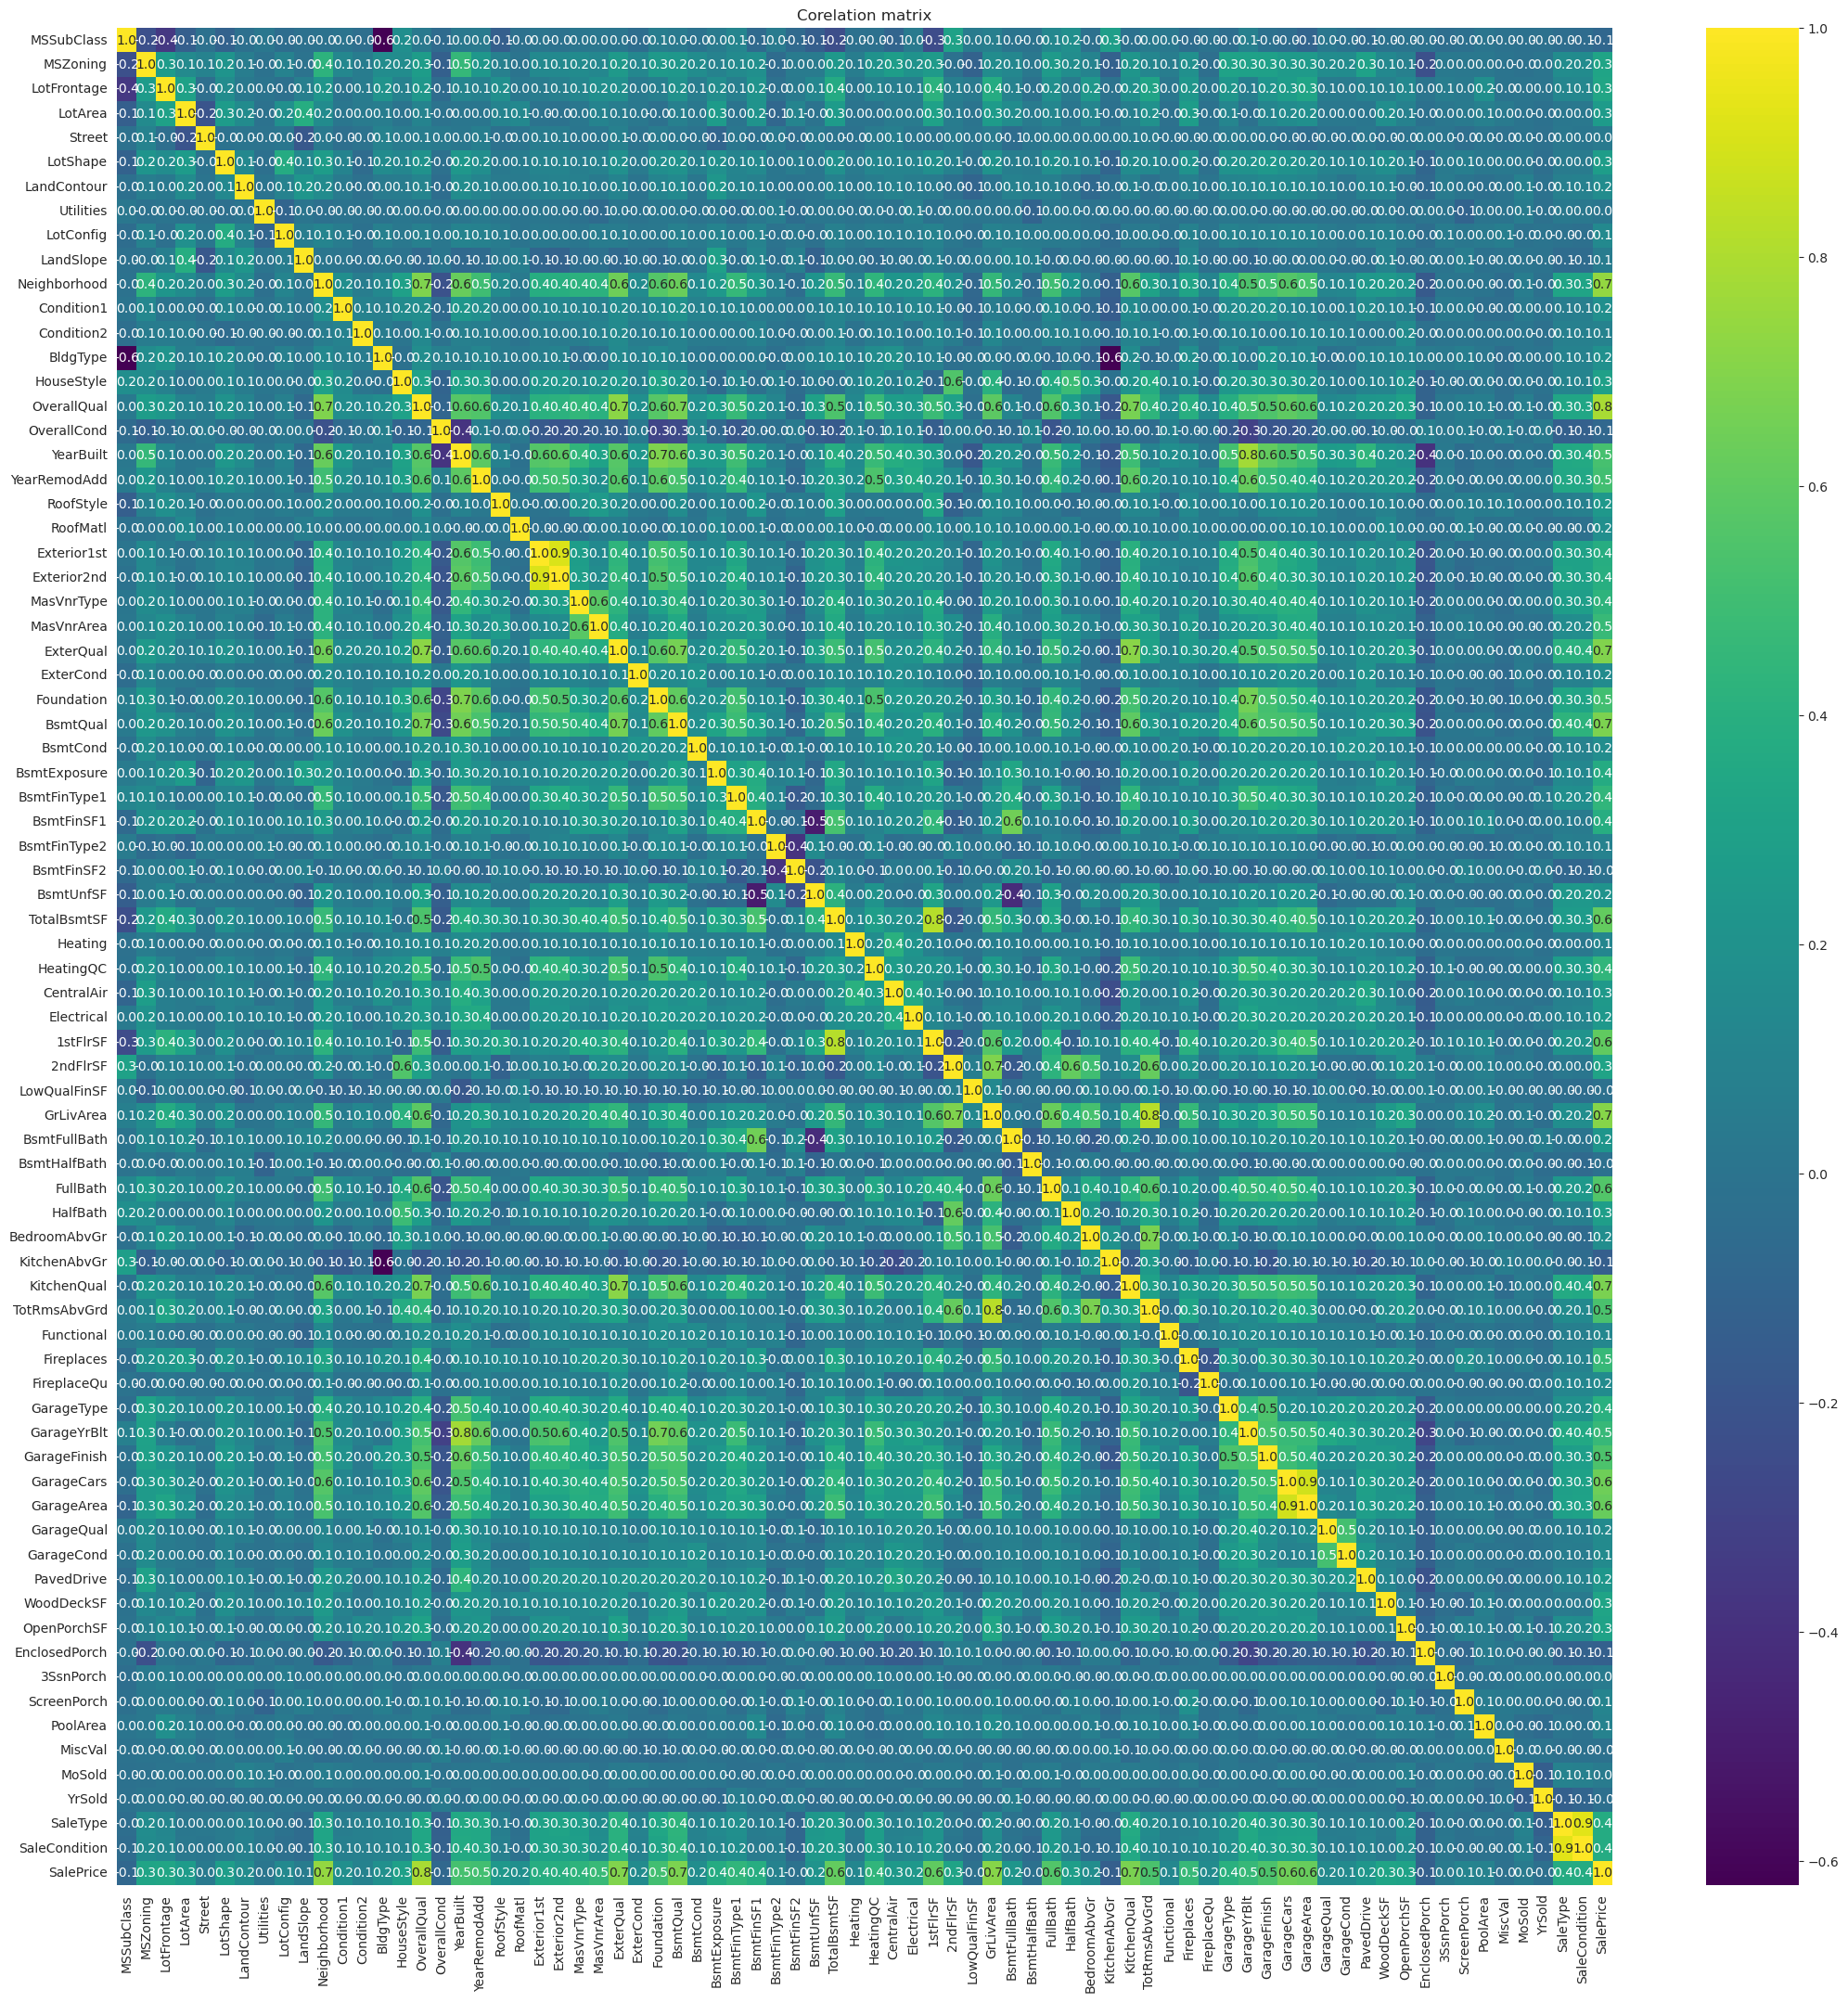

In [8]:
# Matrix Correlation
mc = data.corr()
plt.figure(figsize=(26,26))
sns.heatmap(mc, annot=True, fmt='.1f', cmap='viridis')
plt.title("Corelation matrix");

In [9]:
# Select features with corr > threshold
threshold = .25
best_features = mc[(mc['SalePrice'] >= threshold) | (mc['SalePrice'] <= threshold * -1)]['SalePrice'].index[:-1]
best_features


Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition'],
      dtype='object')

## Test model

In [10]:
X = data[best_features]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Run model

In [11]:
# Test all params
all_params = {
    "n_estimators": range(50, 500, 50),
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_features": ["sqrt", "log2", None],
}

# best params
params_01 = {
    "criterion": ["friedman_mse"],
    "max_features": ["sqrt"],
    "n_estimators": [100],
}

params_02 = {"criterion": "poisson", "max_features": "sqrt", "n_estimators": 400}

model = GridSearchCV(RandomForestRegressor(), all_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

display("Best params:", model.best_params_)
display("Best score:", model.best_score_)

'Best params:'

{'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 200}

'Best score:'

0.8466689367062881

In [12]:
results_regression(y_test, y_pred)

MSE: 664138832.9619472
RMSE: 25770.891194561882
MAE: 15626.044606164383
MAPE: 0.09528102317372109
R2_SCORE 0.9048251778043537
